# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
from pathlib import Path

# Study data files
mouse_metadata_path = Path("..\Data\Mouse_metadata.csv")
study_results_path = Path("..\Data\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_merge_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID"])

# Display the data table for preview
mouse_data_merge_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [2]:
# Checking the number of mice.
mouse_count= mouse_data_merge_df["Mouse ID"].value_counts()
mouse_count = len(mouse_count)
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = mouse_data_merge_df.loc[mouse_data_merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_data_merge_df[mouse_data_merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mouse_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_df = mouse_data_merge_df[mouse_data_merge_df["Mouse ID"]!="g989"]
clean_mouse_data_df.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_updated = clean_mouse_data_df["Mouse ID"].value_counts()
clean_mouse_count = len(mouse_count_updated)
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
grouped_stats = clean_mouse_data_df.groupby("Drug Regimen")
tumor_volume_mean = grouped_stats["Tumor Volume (mm3)"].mean()
tumor_volume_median = grouped_stats["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_stats["Tumor Volume (mm3)"].var()
tumor_volume_std = grouped_stats["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_stats["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                          "Median Tumor Volume": tumor_volume_median,
                          "Tumor Volume Variance": tumor_volume_variance,
                          "Tumor Volume Std. Dev.": tumor_volume_std,
                          "Tumor Volume Std. Err.": tumor_volume_sem})
summary_df 

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
# Use grouped data from previous cell to write summary stats
summary_agg_df = grouped_stats.agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Need to use .groupby plus .count to get timepoints for each drug regimen
bar_chart_grouped = clean_mouse_data_df.groupby(["Drug Regimen"])["Timepoint"].count()
bar_chart_grouped

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

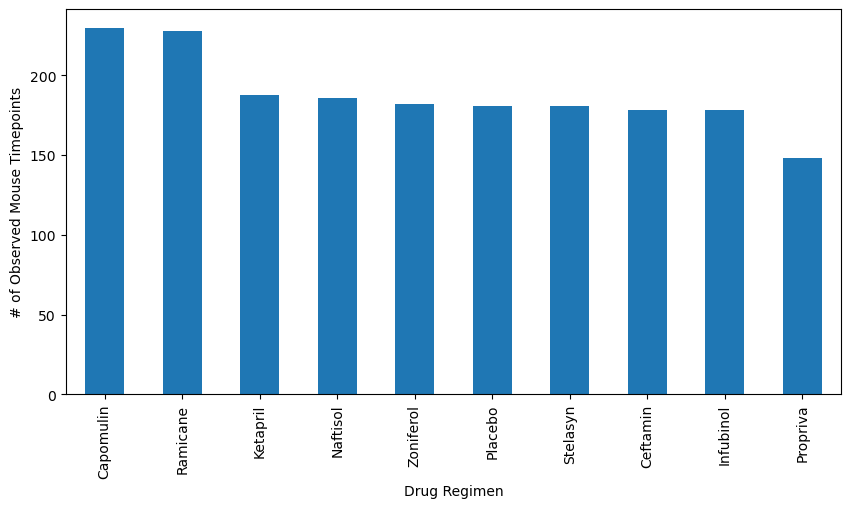

<Figure size 640x480 with 0 Axes>

In [10]:
# Create the first bar chart with the Pandas DataFrame.plot() method
# use sort_values to display chart in descending order
# Plot bar chart
pandas_bar_chart = bar_chart_grouped.sort_values(ascending=False).plot(kind="bar", figsize=(10,5))

# Set the xlabel and ylabel 
pandas_bar_chart.set_xlabel("Drug Regimen")
pandas_bar_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

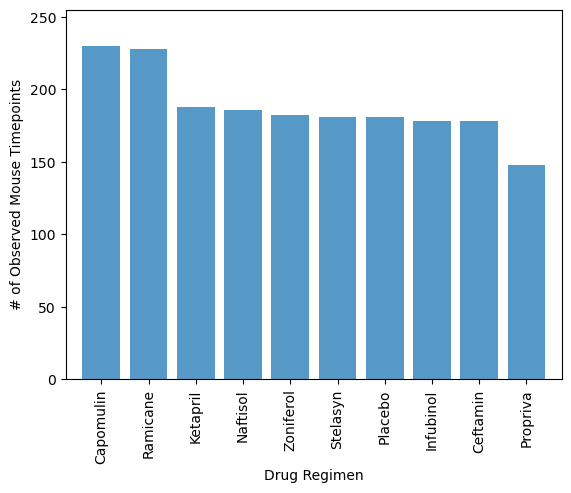

<Figure size 640x480 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
timepoint_mouse_id  = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(0, len(timepoint_mouse_id))
tick_locations = [x for x in x_axis]

# Use #1f77b4 for default blue to match bar chart above
plt.bar(x_axis, timepoint_mouse_id, color="#1f77b4", alpha=0.75, align="center")

# Set the xlimit and ylimit 
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(timepoint_mouse_id) + 25)

# Set the xlabel and ylabel 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

# Set tick location
plt.xticks(tick_locations, drug_regimen, rotation = 90)

plt.show()
plt.tight_layout()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Need to use .groupby plus .count to get total of mice thats male/female
pie_chart_grouped = clean_mouse_data_df.groupby(["Sex"])["Mouse ID"].count()
pie_chart_grouped

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64

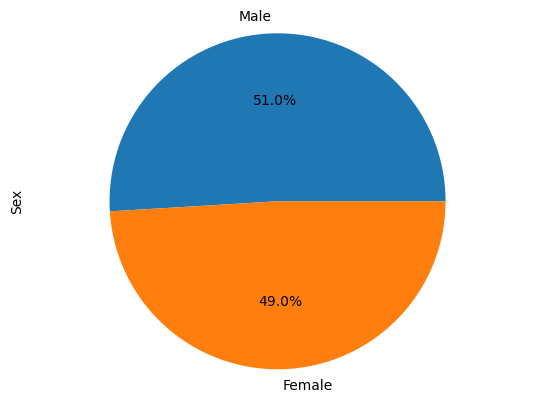

<Figure size 640x480 with 0 Axes>

In [13]:
# Create the first pie chart with the Pandas DataFrame.plot() method
# use sort_values to display chart in descending order
pandas_pie = pie_chart_grouped.sort_values(ascending=False).plot(kind="pie", y="Sex", autopct="%1.1f%%")

# Set ylabel 
pandas_pie.set_ylabel("Sex")

plt.axis("equal")
plt.show()
plt.tight_layout()

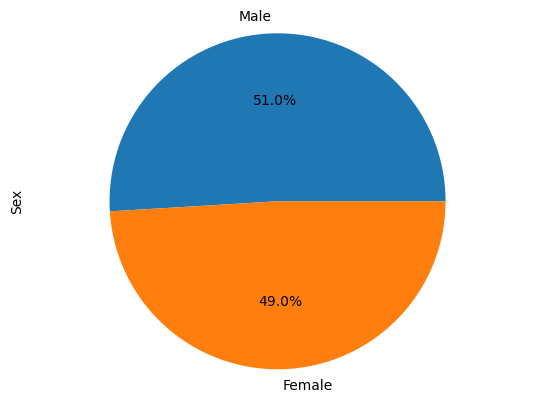

<Figure size 640x480 with 0 Axes>

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
mice_gender_total = [958, 922]

# Use #1f77b4 for default blue and #ff7f0e for orange to match pie chart above
colors = ["#1f77b4", "#ff7f0e"] 

plt.pie(mice_gender_total, labels=gender, colors=colors, autopct="%1.1f%%")

# Set ylabel 
plt.ylabel("Sex")

plt.axis("equal")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Use .groupby to get timepoint for each mouse id
# Start by getting the last (greatest) timepoint for each mouse
grouped_data = clean_mouse_data_df.groupby(["Mouse ID"])
max_timepoint = grouped_data["Timepoint"].max()

# Convert list to Dataframe 
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_merge_df = pd.merge(clean_mouse_data_df, max_timepoint_df, on =["Mouse ID", "Timepoint"]).reset_index()
max_merge_df


,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,f932,0,45.000000,0,Ketapril,Male,15,29
1,1,x336,0,45.000000,0,Naftisol,Female,4,29
2,2,h428,0,45.000000,0,Ketapril,Female,1,27
3,3,v199,0,45.000000,0,Naftisol,Female,17,29
4,4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...,...
243,243,r944,45,41.581521,2,Capomulin,Male,12,25
244,244,u364,45,31.023923,3,Capomulin,Male,18,17
245,245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,246,x773,45,58.634971,4,Placebo,Female,21,30


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# Loop through each drug in the treatment list, locating the rows in the merged DataFrame that correspond to each treatment. 
for drug in treatments:
    drug_reg_tumor_vol = max_merge_df.loc[max_merge_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # Append the resulting final tumor volumes for each drug to the empty list 
    tumor_volume_list.append(drug_reg_tumor_vol)
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = drug_reg_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers by using the upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = drug_reg_tumor_vol.loc[(drug_reg_tumor_vol < lower_bound) | (drug_reg_tumor_vol > upper_bound)]

    #Print Results
    print(f"{drug}'s potential outliers:{outliers}")


Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:20    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


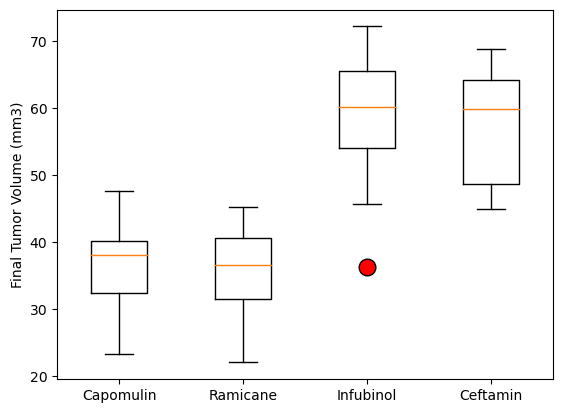

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Highlight any potential outliers in the plot by changing their color and style.
red_circle = dict(markerfacecolor="r", marker = "o", markersize=12)
plt.boxplot(tumor_volume_list, labels = treatments, flierprops = red_circle)

# Set the ylabel
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Locate the total list of mice treated with Capomulin
capomulin_df = clean_mouse_data_df.loc[clean_mouse_data_df["Drug Regimen"] == "Capomulin",:]

# Locate the mouse l509 treated with Capomulin
mouse_l509_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509",:]
mouse_l509_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


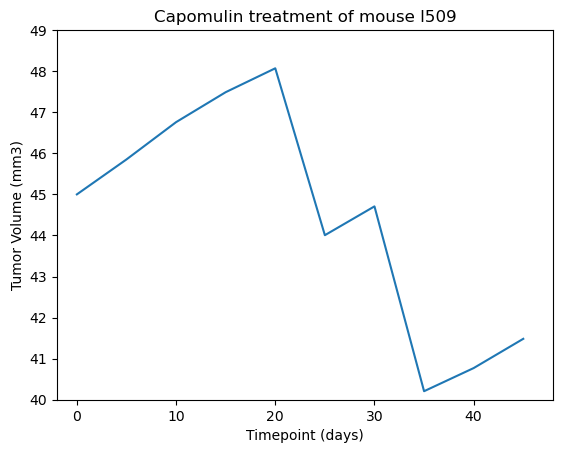

<Figure size 640x480 with 0 Axes>

In [19]:
# Create line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_axis = mouse_l509_df["Timepoint"]
y_axis = mouse_l509_df["Tumor Volume (mm3)"]

Capomulin_l509, = plt.plot(x_axis, y_axis)

# Set the xlimit and ylimit
plt.xlim(-2,48)
plt.ylim(40,49)

# Set the title, xlabel and ylabel 
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
plt.tight_layout()

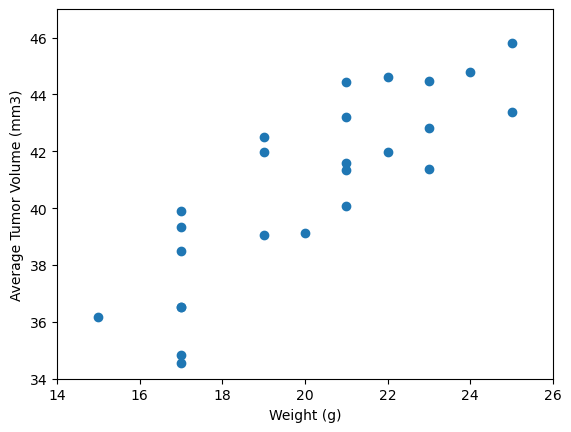

<Figure size 640x480 with 0 Axes>

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Create scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = clean_mouse_data_df.loc[clean_mouse_data_df["Drug Regimen"] == "Capomulin",:]
weight = capomulin_df.groupby(["Mouse ID"])["Weight (g)"].mean()
average_tumor_volume = capomulin_df.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(weight, average_tumor_volume, marker="o" )

# Set the xlimit and ylimit
plt.xlim(14,26)
plt.ylim(34,47)

# Set the xlabel and ylabel 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
plt.tight_layout()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


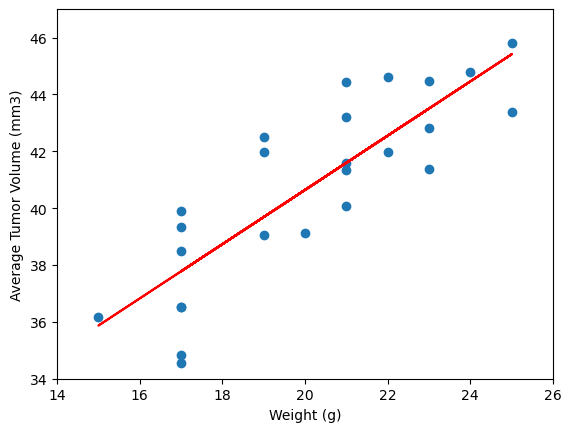

<Figure size 640x480 with 0 Axes>

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Pull average weight and tumor volume for previous cell and set the x and y values
x_values = weight  
y_values = average_tumor_volume 

# Calculate the correlation coefficient and linear regression model 
# between mouse weight and average observed tumor volume for the entire Capomulin treatment regimen
correlation = st.pearsonr(x_values, y_values)
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plot the linear regression model on top of the previous scatter plot
plt.scatter(x_values, y_values )
plt.plot(x_values, regress_values, "r-")

# Set the xlimit and ylimit 
plt.xlim(14,26)
plt.ylim(34,47)

# Set the xlabel and ylabel 
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Print correlation and plot 
print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")
plt.show()
plt.tight_layout()